In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Dataset:
    Feature 1  Feature 2  Class
0   1.392452   1.873864      1
1   1.315394   2.928715      1
2   0.155599   1.532998      1
3   4.292490   2.488810      1
4   2.710267   3.055534      1


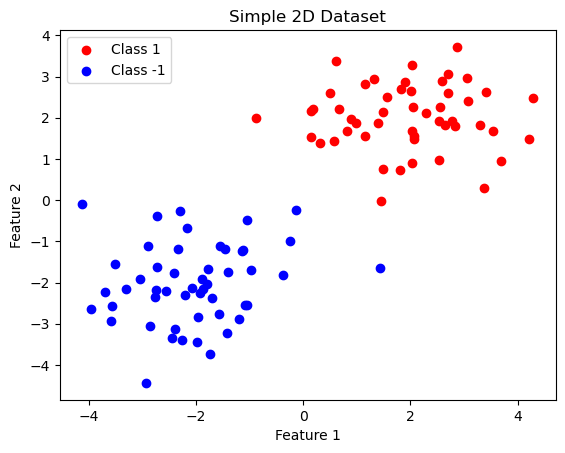

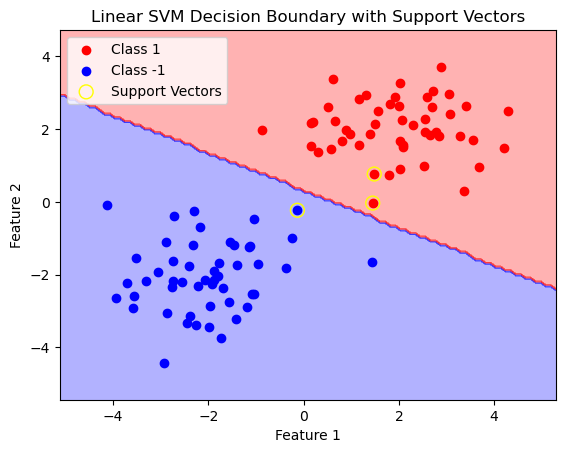

In [8]:
def generate_linearly_separable_dataset(n_samples=100, random_state=40):
    np.random.seed(random_state)
    X = np.random.randn(n_samples, 2)
    X[:n_samples//2] = X[:n_samples//2] + 2
    X[n_samples//2:] = X[n_samples//2:] - 2
    y = np.array([1] * (n_samples // 2) + [-1] * (n_samples // 2))
    return X, y

def create_dataframe(X, y):
    df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
    df['Class'] = y
    return df

def plot_dataset(X, y, title='Dataset'):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Class -1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.support_vectors_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]
        
        # Calculate support vectors
        distances = np.abs(np.dot(X, self.w) - self.b)
        self.support_vectors_ = X[(distances <= 1 + 1e-5)]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

def plot_decision_boundary(X, y, model, title='Decision Boundary'):
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_new)
    zz = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, zz, cmap=ListedColormap(['blue', 'red']), alpha=0.3)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Class -1')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='yellow', label='Support Vectors')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def main():
    # Generate and visualize the dataset
    X, y = generate_linearly_separable_dataset()
    
    # Create and display a DataFrame of the dataset
    df = create_dataframe(X, y)
    print("Dataset:\n", df.head())
    
    # Train a linear SVM
    linear_svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    linear_svm.fit(X, y)
    
    # Plot the original dataset
    plot_dataset(X, y, title='Simple 2D Dataset')
    
    # Plot the decision boundary along with support vectors
    plot_decision_boundary(X, y, linear_svm, title='Linear SVM Decision Boundary with Support Vectors')

if __name__ == "__main__":
    main()